In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

/Users/derin/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data_train = pd.DataFrame(pd.read_csv("/Users/derin/Desktop/ml_proj_yedek/data_train.csv"))
data_test = pd.DataFrame(pd.read_csv("/Users/derin/Desktop/ml_proj_yedek/data_test.csv"))
data_train = data_train.dropna(0)
data_test = data_test.dropna(0)

In [16]:
# data_train["visitors"]

In [3]:
data_train = data_train.set_index("visit_date", drop=True)
data_test = data_test.set_index("visit_date", drop=True)

In [4]:
arima_dates = pd.Series(data_train.index.values).apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

## Aggregation

We can find the total and the average number of visitors in each area for any given day by multiplying the __date-area matrix__ formed below by grouping the data by the day indexes with the __visitor__ column. No we can't actually 

In [5]:
area_names = data_train.columns.values[30:]
area_names[:5]
date_area_matrix = data_train[area_names]
date_area_matrix["visitors"] = pd.Series(data_train["visitors"])

/Users/derin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
def area_indicator(data):
    for area in area_names:
        data[area] = data[area].apply(lambda x: int(x != 0))
    return data

In [7]:
date_area_bydaygroups = date_area_matrix.groupby\
(date_area_matrix.index).sum()

date_area_bydaygroups = area_indicator(date_area_bydaygroups)

area_date_matrix = np.array(date_area_bydaygroups[area_names].T)

daily_visitors_col = np.array(date_area_bydaygroups["visitors"])
daily_visitors_col = np.array(len(daily_visitors_col)*[daily_visitors_col])

## dim(area x day) matrix where each row entry corresponds
## to a series of the TOTAL number of visitors for each date
## in the index. 
## For example, entry_row(3)_col(4) shows the total number of
## visitors in 3rd area on the 4th day. 

total_area_day = np.dot(area_date_matrix, daily_visitors_col)
total_area_day

array([[  358275.,   609450.,   838100., ...,  5012875.,  3759975.,
         4484175.],
       [       0.,        0.,        0., ...,        0.,        0.,
               0.],
       [  197262.,   335556.,   461448., ...,  2760030.,  2070198.,
         2468934.],
       ..., 
       [  204849.,   348462.,   479196., ...,  2866185.,  2149821.,
         2563893.],
       [  357432.,   608016.,   836128., ...,  5001080.,  3751128.,
         4473624.],
       [  358275.,   609450.,   838100., ...,  5012875.,  3759975.,
         4484175.]])

In [32]:
total_area_day_df.iloc[180:185]

,Fukuoka-ken Fukuoka-shi Daimyō,Fukuoka-ken Fukuoka-shi Hakata Ekimae,Fukuoka-ken Fukuoka-shi Imaizumi,Fukuoka-ken Fukuoka-shi Momochi,Fukuoka-ken Fukuoka-shi Shiobaru,Fukuoka-ken Fukuoka-shi Takatori,Fukuoka-ken Fukuoka-shi Tenjin,Fukuoka-ken Fukuoka-shi Torikai,Fukuoka-ken Itoshima-shi Maebarunishi,Fukuoka-ken Kitakyūshū-shi Konyamachi,...,Ōsaka-fu Neyagawa-shi Honmachi,Ōsaka-fu Sakai-shi Minamikawaramachi,Ōsaka-fu Suita-shi Izumichō,Ōsaka-fu Ōsaka-shi Fuminosato,Ōsaka-fu Ōsaka-shi Kyōmachibori,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,Ōsaka-fu Ōsaka-shi Nakanochō,Ōsaka-fu Ōsaka-shi Nanbasennichimae,Ōsaka-fu Ōsaka-shi Shinmachi,Ōsaka-fu Ōsaka-shi Ōgimachi
2016-06-29,2068900.0,0.0,1139112.0,2068900.0,0.0,1903388.0,1922860.0,2068900.0,1888784.0,0.0,...,2044560.0,1883916.0,0.0,1844972.0,1757348.0,2068900.0,1995880.0,1182924.0,2064032.0,2068900.0
2016-06-30,2110550.0,0.0,1162044.0,2110550.0,0.0,1941706.0,1961570.0,2110550.0,1926808.0,0.0,...,2085720.0,1921842.0,0.0,1882114.0,1792726.0,2110550.0,2036060.0,1206738.0,2105584.0,2110550.0
2016-07-01,6464675.0,0.0,3559374.0,6464675.0,0.0,5947501.0,6008345.0,6464675.0,5901868.0,0.0,...,6388620.0,5886657.0,0.0,5764969.0,5491171.0,6464675.0,6236510.0,3696273.0,6449464.0,6464675.0
2016-07-02,6642325.0,0.0,3657186.0,6642325.0,0.0,6110939.0,6173455.0,6642325.0,6064052.0,0.0,...,6564180.0,6048423.0,0.0,5923391.0,5642069.0,6642325.0,6407890.0,3797847.0,6626696.0,6642325.0
2016-07-03,4424250.0,0.0,2435940.0,4424250.0,0.0,4070310.0,4111950.0,4424250.0,4039080.0,0.0,...,4372200.0,4028670.0,0.0,3945390.0,3758010.0,4424250.0,4268100.0,2529630.0,4413840.0,4424250.0


In [33]:
total_area_day_df.shape

(425, 102)

In [34]:
data_train.shape

(173703, 132)

In [8]:
unique_dateindex = sorted([datetime.strptime(x, "%Y-%m-%d") for x in list(set(date_area_matrix.index.values))])

In [9]:
total_area_day_df = pd.DataFrame(total_area_day, columns=unique_dateindex, index=area_names).T
total_area_day_df.to_csv("total_visitors_byday_byarea.csv")
## total number of visitors for each area on each day

In [12]:
total_area_day_df.shape

(425, 102)

In [17]:
len(area_names)

102

In [18]:
len(list(set(date_area_matrix.index.values)))

425

In [19]:
total_area_day[2:]

array([[  197262.,   335556.,   461448., ...,  2760030.,  2070198.,
         2468934.],
       [  358275.,   609450.,   838100., ...,  5012875.,  3759975.,
         4484175.],
       [       0.,        0.,        0., ...,        0.,        0.,
               0.],
       ..., 
       [  204849.,   348462.,   479196., ...,  2866185.,  2149821.,
         2563893.],
       [  357432.,   608016.,   836128., ...,  5001080.,  3751128.,
         4473624.],
       [  358275.,   609450.,   838100., ...,  5012875.,  3759975.,
         4484175.]])

In [20]:
total_area_day.shape ## good, corresponds

(102, 425)

In [21]:
len(date_area_bydaygroups)

425

In [24]:
X = np.array(range(total_area_day.shape[0])) ## area index
Y = np.array(range(total_area_day.shape[1])) ## unique date index
Z = total_area_day ## input - total visitor numbers

KeyboardInterrupt: 

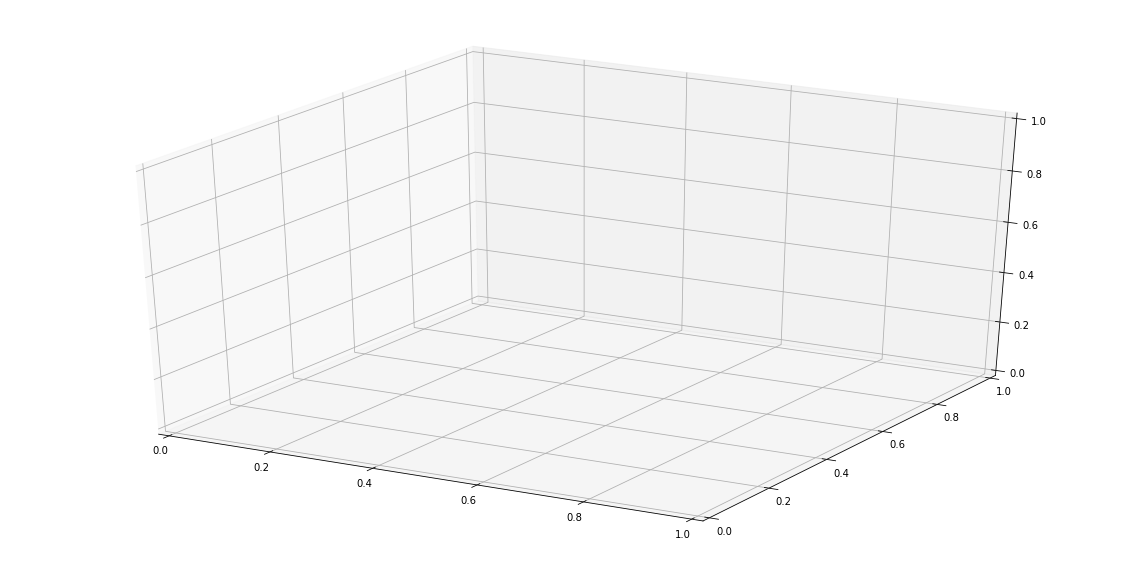

In [25]:
from matplotlib import cm
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
X = np.array(range(total_area_day.shape[0])) ## area index
Y = np.array(range(total_area_day.shape[1])) ## unique date index
Z = total_area_day.T ## input - total visitor numbers
X, Y = np.meshgrid(X, Y)
X,Z = np.meshgrid(X,Z)
Y,Z = np.meshgrid(Y,Z)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [26]:
total_area_day_try = total_area_day[2:]
X_try = np.array(range(total_area_day_try.shape[0]))
Y_try = np.array(range(total_area_day_try.shape[1])) ## unique date index 
Z_try = total_area_day_try.T

In [27]:
import plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username="asenaderin", api_key="4Ayv1MHEPPhvs043i2np")

In [28]:
surface = go.Surface(x=X_try, y=Y_try, z=Z_try, colorscale='Viridis')
data = [surface]
layout = go.Layout(
    title='Another Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='parametric-plot-viridis')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~asenaderin/0 or inside your plot.ly account where it is named 'parametric-plot-viridis'


In [65]:
trace1 = go.Scatter3d(x=X,y=Y,z=Z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.plotly.iplot(fig, filename='3d-scatter-colorscale')

NameError: name 'Z' is not defined

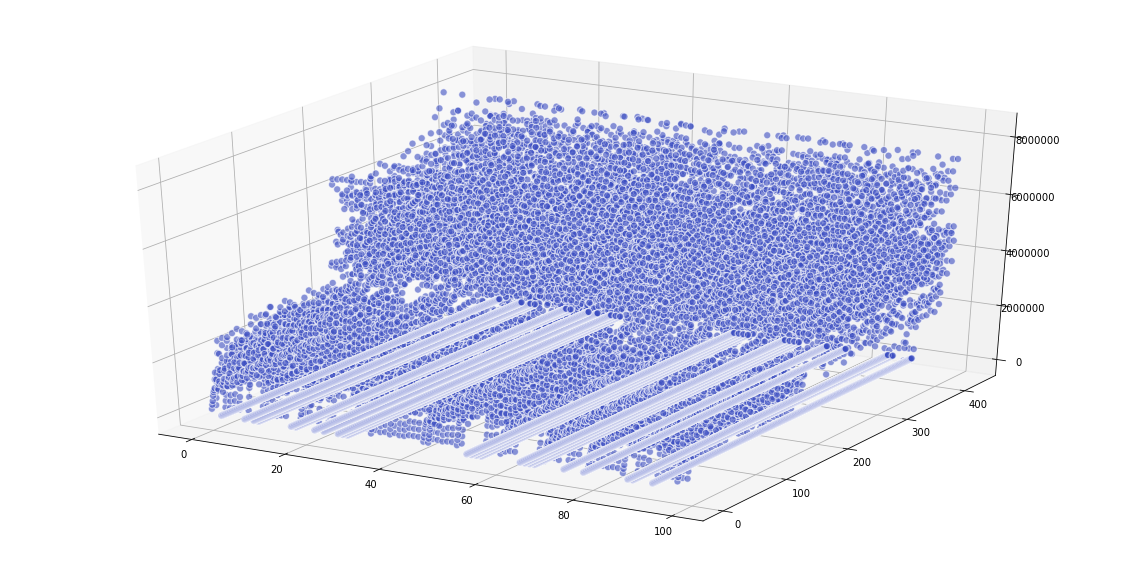

In [111]:
%matplotlib inline
X, Y = np.meshgrid(X_try, Y_try)
# col = [cm.colors(float(i)/(30)) for i in range(30)]
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.scatter3D(X,Y,Z_try, c=cm.coolwarm(1),
            alpha=0.6, edgecolor="w", s=50)
ax.grid()